# Make sure run from ipykernel located in segmenteverygrain

## Run segmentation

Grains are supposed to be well defined in the image; e.g., if a grain consists of only a few pixels, it is unlikely to be detected.

The segmentation can take a few minutes even for medium-sized images, so do not start with large images (downsample them if necessary). Images with ~2000 pixels along their largest dimension are a good start.

,label,area,centroid-0,centroid-1,major_axis_length,minor_axis_length,orientation,perimeter,max_intensity-0,max_intensity-1,max_intensity-2,mean_intensity-0,mean_intensity-1,mean_intensity-2,min_intensity-0,min_intensity-1,min_intensity-2
0,1,0.088608,813.544059,65.257674,0.370015,0.314477,0.531293,1.170205,182.0,182.0,182.0,113.440592,113.440592,113.440592,45.0,45.0,45.0
1,2,0.069952,158.137466,483.973925,0.312396,0.289178,-0.325709,1.000264,160.0,160.0,160.0,103.009378,103.009378,103.009378,40.0,40.0,40.0
2,3,0.170240,135.041447,237.946429,0.521077,0.422352,0.990970,1.604244,195.0,195.0,195.0,111.937970,111.937970,111.937970,37.0,37.0,37.0
3,4,0.075664,405.071897,997.216748,0.348057,0.281255,-0.412894,1.056029,147.0,147.0,147.0,97.259251,97.259251,97.259251,30.0,30.0,30.0
4,5,0.149376,475.520030,302.375857,0.495586,0.387516,0.179298,1.500244,185.0,185.0,185.0,107.919880,107.919880,107.919880,37.0,37.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,81,0.182752,524.743390,440.285764,0.850391,0.321626,0.287882,2.322871,167.0,167.0,167.0,103.894064,103.894064,103.894064,35.0,35.0,35.0
80,82,0.103152,27.105941,383.372421,0.505702,0.283844,-1.520975,1.408264,147.0,147.0,147.0,98.345587,98.345587,98.345587,52.0,52.0,52.0
81,83,0.280512,42.348734,229.824606,0.997028,0.393493,1.407785,2.518518,172.0,172.0,172.0,101.306012,101.306012,101.306012,32.0,32.0,32.0
82,84,0.424000,45.835585,1096.847849,1.295887,0.492345,-1.504561,3.456861,190.0,190.0,190.0,112.271623,112.271623,112.271623,47.0,47.0,47.0


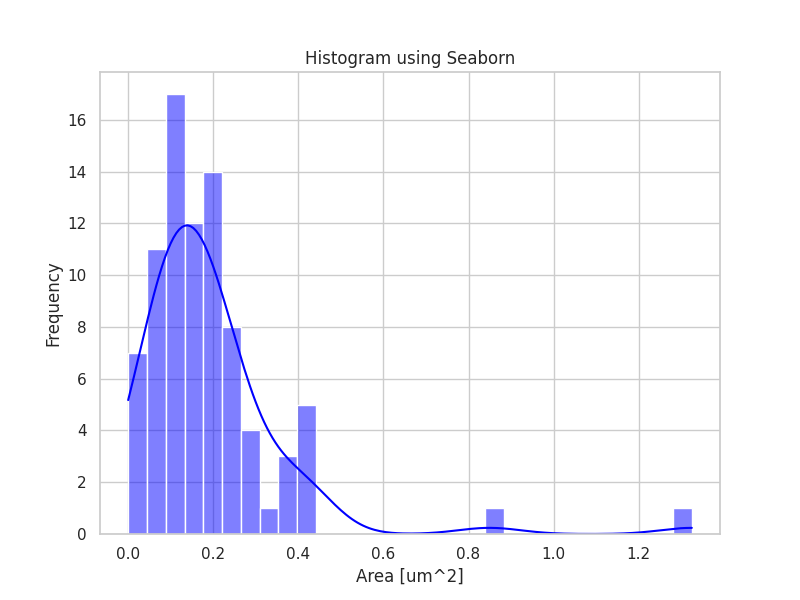

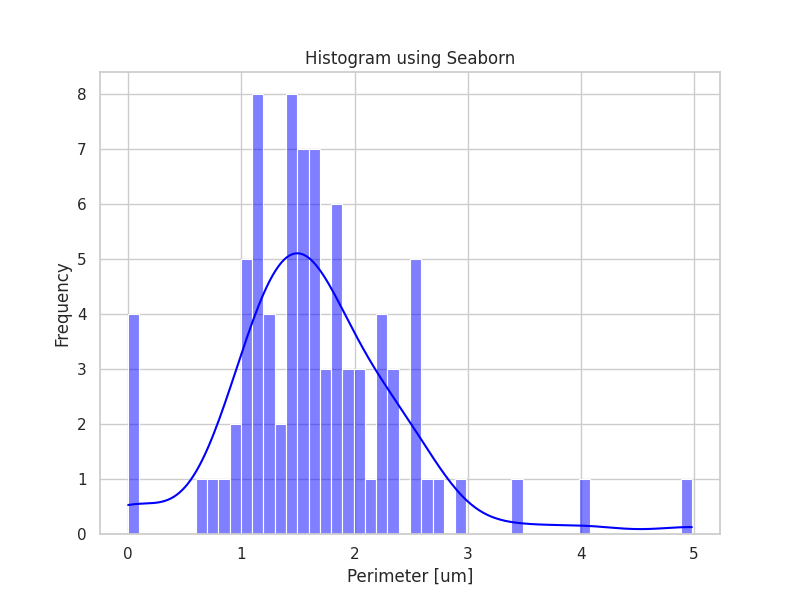

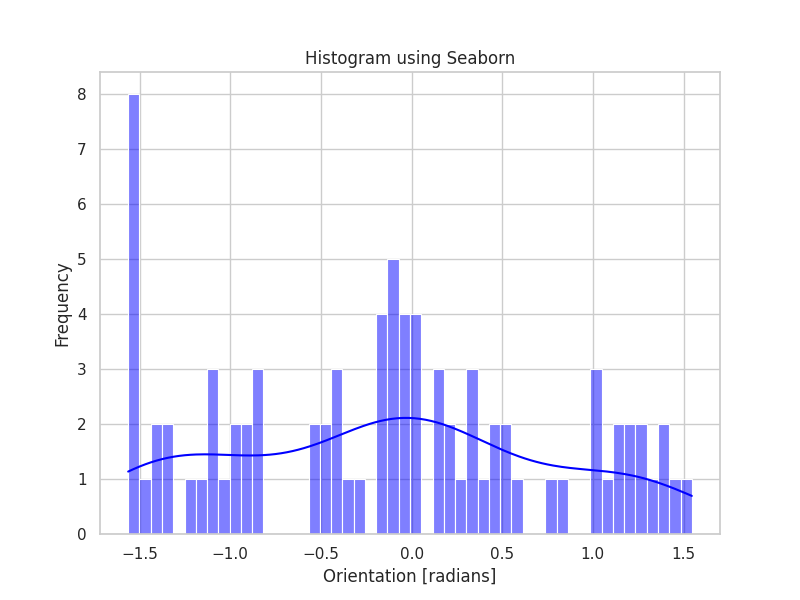

In [39]:
import seaborn as sns
import pandas as pd

grain_df = pd.read_csv
n_of_units = 2 # micron
units_per_pixel = n_of_units/500 # length of scale bar in pixels

props = regionprops_table(labels.astype('int'), intensity_image = big_im, properties =\
        ('label', 'area', 'centroid', 'major_axis_length', 'minor_axis_length', 
         'orientation', 'perimeter', 'max_intensity', 'mean_intensity', 'min_intensity'))
grain_data = pd.DataFrame(props)

grain_data['major_axis_length'] = grain_data['major_axis_length'].values*units_per_pixel
grain_data['minor_axis_length'] = grain_data['minor_axis_length'].values*units_per_pixel
grain_data['perimeter'] = grain_data['perimeter'].values*units_per_pixel
grain_data['area'] = grain_data['area'].values*units_per_pixel**2

display(grain_data)

# Create a histogram using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(grain_data['area'], bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel('Area [um^2]')
plt.ylabel('Frequency')
plt.title('Histogram using Seaborn')

# Show the plot
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(grain_data['perimeter'], bins=50, kde=True, color='blue')

# Add labels and title
plt.xlabel('Perimeter [um]')
plt.ylabel('Frequency')
plt.title('Histogram using Seaborn')

# Show the plot
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(grain_data['orientation'], bins=50, kde=True, color='blue')

# Add labels and title
plt.xlabel('Orientation [radians]')
plt.ylabel('Frequency')
plt.title('Histogram using Seaborn')

# Show the plot
plt.show()

grain_data.to_csv('/groups/aprintz/github/segmenteverygrain/perovskite_sems/og/Pristine_MAPbI3_0cyc_q001.csv')

## Get grain size distribution

Run this cell and then click (left mouse button) on one end of the scale bar in the image and click (right mouse button) on the other end of the scale bar:

In [15]:
cid5 = fig.canvas.mpl_connect('button_press_event', lambda event: seg.click_for_scale(event, ax))

Use the length of the scale bar in pixels (it should be printed above) to get the scale of the image (in units / pixel):

In [16]:
# n_of_units = 2 # centimeters in the case of 'IMG_5208_image.png'
# units_per_pixel = n_of_units/500 # length of scale bar in pixels

In [17]:
# props = regionprops_table(labels.astype('int'), intensity_image = big_im, properties =\
#         ('label', 'area', 'centroid', 'major_axis_length', 'minor_axis_length', 
#          'orientation', 'perimeter', 'max_intensity', 'mean_intensity', 'min_intensity'))
# grain_data = pd.DataFrame(props)
# grain_data['major_axis_length'] = grain_data['major_axis_length'].values*units_per_pixel
# grain_data['minor_axis_length'] = grain_data['minor_axis_length'].values*units_per_pixel
# grain_data['perimeter'] = grain_data['perimeter'].values*units_per_pixel
# grain_data['area'] = grain_data['area'].values*units_per_pixel**2

In [18]:
grain_data.head()

,label,area,centroid-0,centroid-1,major_axis_length,minor_axis_length,orientation,perimeter,max_intensity-0,max_intensity-1,max_intensity-2,mean_intensity-0,mean_intensity-1,mean_intensity-2,min_intensity-0,min_intensity-1,min_intensity-2
0,1,0.373616,391.963214,75.193097,0.879132,0.570593,0.113984,3.560106,233.0,233.0,233.0,99.644384,99.644384,99.644384,14.0,14.0,14.0
1,2,0.271600,295.935258,867.378616,0.617328,0.588864,0.667493,2.064861,189.0,189.0,189.0,104.579853,104.579853,104.579853,31.0,31.0,31.0
2,3,0.424912,758.034153,61.212901,0.989097,0.558041,-0.063365,2.681097,195.0,195.0,195.0,101.368152,101.368152,101.368152,20.0,20.0,20.0
3,4,0.080880,913.313155,28.085856,0.389286,0.279770,-0.013539,1.155813,193.0,193.0,193.0,101.834619,101.834619,101.834619,13.0,13.0,13.0
4,5,0.125056,634.170164,991.827277,0.483616,0.340896,0.505152,1.424528,183.0,183.0,183.0,96.969422,96.969422,96.969422,24.0,24.0,24.0


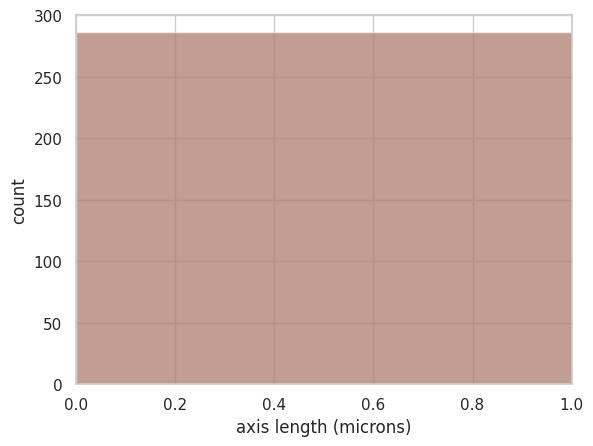

In [ ]:
plt.figure()
plt.hist(grain_data['major_axis_length'], np.arange(0, 200, 5), alpha=0.5)
plt.hist(grain_data['minor_axis_length'], np.arange(0, 200, 5), alpha=0.5)

plt.xlabel('axis length (microns)')
plt.xlim(0, 1)
plt.ylabel('count');

## Save mask and grain labels to PNG files

In [ ]:
dirname = '/Users/zoltan/Dropbox/Segmentation/images/'
# write grayscale mask to PNG file
cv2.imwrite(dirname + fname.split('/')[-1][:-4] + '_mask.png', mask_all)
# Save the image as a PNG file
cv2.imwrite(dirname + fname.split('/')[-1][:-4] + '_image.png', cv2.cvtColor(big_im, cv2.COLOR_BGR2RGB))

False